## Prep notebook with relevant modules

In [2]:
%pip install -U odp-sdk --quiet 2>/dev/null

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from ODPworkspace_demotools import mapOQS, pydeck_plot
from odp_sdk.client import OdpClient # The SDK

In [4]:
client = OdpClient()

## Geospatial query of PGS data
- Either define a polygon manually.
- Or use the interactive map to create a polygon.

In [55]:
query_geometry.value = "POLYGON((-37.397 -11.953, -35.640 -9.015, -32.256 -10.272, -36.079 -16.678, -37.397 -11.953))"

### Use a map to create a geospatial query for the API call
- Click on the 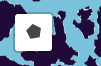 button to create a polygon for the query
- The data in this notebook is available offshore Brazil, so create a polygon there.

In [56]:
query_geometry = mapOQS()

### Get data identifiers from catalog

In [57]:
adcp_dataset = client.catalog.get(("c85fa191-3256-41f3-8c6d-3e73f14c0f49"))
adcp_dataset.metadata.display_name

'PGS physics data - ADCP current measurements - aggregated'

In [58]:
CTD_dataset = client.catalog.get(("861f086f-776b-406c-af0e-9062dfd91f1c"))
CTD_dataset.metadata.display_name

'PGS physics data - CTD profiles - aggregated'

In [59]:
biota_dataset = client.catalog.get(("c571f34a-490e-4a23-97ef-81c9efa41558"))
biota_dataset.metadata.display_name

'PGS biota data - mammal and turtle observations - aggregated'

### Request geospatially filtered data from ODP API

In [60]:
adcp_data = client.tabular.select_as_list(adcp_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=10000)

In [61]:
CTD_data = client.tabular.select_as_list(CTD_dataset, filter_query={"#AND": [{'#ST_WITHIN': ['$geometry', query_geometry.value]},{"#LESS_THAN": ["$Depth_m", 5]}]}, limit=10000)

In [62]:
biota_data = client.tabular.select_as_list(biota_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=10000)

## Visualize data

### Plot datapoints from query on a map

In [63]:
pydeck_plot([adcp_data[99::100], CTD_data, biota_data], pickable=True, zoom=3, lat=-2, lon=-35)

{
  "initialViewState": {
    "latitude": -2,
    "longitude": -35,
    "zoom": 3
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "DatetimeUtc": "2017-11-29 14:04:29",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": 0.338973509933775,
          "cur_n_ms-1": -0.164985099337748,
          "depth_m": 14.22,
          "geometry": {
            "coordinates": [
              -36.542227,
              -4.669813
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2018-02-03 12:51:44",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": -0.313162828947368,
          "cur_n_ms-1": 0.0499144736842106,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -36.274494,
              -4.461776
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2018-02-05 20:10:10",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": 0.0891518151815183,
          "cur_n_ms-1": 0.198376237623762,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -36.300158,
              -4.645548
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2018-02-08 05:24:26",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": 0.0954672131147542,
          "cur_n_ms-1": 0.159016393442623,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -36.405515,
              -4.617999
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2018-02-13 18:11:36",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": 0.212410852713178,
          "cur_n_ms-1": -0.221996124031008,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -36.47882,
              -4.642381
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2018-02-15 03:49:47",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": 0.0428999999999999,
          "cur_n_ms-1": 0.0315393442622951,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -36.457572,
              -4.647135
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2017-11-27 08:38:13",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": -0.0922046204620462,
          "cur_n_ms-1": -0.0485594059405941,
          "depth_m": 24.22,
          "geometry": {
            "coordinates": [
              -36.473272,
              -4.671445
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2017-11-11 17:00:51",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": 0.234853820598007,
          "cur_n_ms-1": 0.170985049833887,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -36.453228,
              -4.648828
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2017-11-14 02:36:35",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": -0.250509966777409,
          "cur_n_ms-1": -0.0344900332225914,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -36.426403,
              -4.665264
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2017-11-21 03:18:28",
          "ProjectNumber": 2017072.0,
          "cur_e_ms-1": -0.135200331125828,
          "cur_n_ms-1": -0.0127615894039735,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -36.417472,
              -4.59008
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "201

### Visualize dataframes

In [17]:
pd.DataFrame(adcp_data[99::100]).head()

,DatetimeUtc,geometry,cur_n_ms-1,ProjectNumber,depth_m,cur_e_ms-1
0,2017-11-21 16:03:38,"{'type': 'Point', 'coordinates': [-37.078253, ...",0.223616,2017072.0,14.22,-0.571664
1,2017-11-22 00:27:14,"{'type': 'Point', 'coordinates': [-37.592247, ...",0.374906,2017072.0,14.22,-0.771192
2,2017-11-22 08:50:36,"{'type': 'Point', 'coordinates': [-37.365693, ...",0.288733,2017072.0,14.22,-0.461263
3,2017-11-22 17:13:56,"{'type': 'Point', 'coordinates': [-37.057239, ...",0.092980,2017072.0,14.22,-0.323543
4,2017-11-23 01:37:31,"{'type': 'Point', 'coordinates': [-36.716193, ...",-0.081035,2017072.0,14.22,-0.257763


In [54]:
pd.DataFrame(CTD_data).head()

,Project,geometry,Velocity_ms-1,DatetimeUtc,Conduct_mS/cm,Depth_m,Temp_C,Density_sigma-T,Pressure_dBar,Salinity_ppm,ProfileName,@@end
0,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.783333, ...",1540.51,2018-09-25 17:48:51,57.72,4.71,26.584,24.503,0.0,37.16,2018033_TS_Dips.xlsm_Profile # 28,NaN
1,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.783333, ...",1540.50,2018-09-25 17:48:53,57.72,3.91,26.586,24.498,0.0,37.16,2018033_TS_Dips.xlsm_Profile # 28,NaN
2,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.783333, ...",1540.49,2018-09-25 17:48:55,57.73,2.87,26.585,24.500,0.0,37.17,2018033_TS_Dips.xlsm_Profile # 28,NaN
3,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.783333, ...",1540.46,2018-09-25 17:48:57,57.71,2.06,26.585,24.486,0.0,37.16,2018033_TS_Dips.xlsm_Profile # 28,NaN
4,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.858333, ...",1540.03,2018-08-23 11:13:48,57.55,3.96,26.348,24.626,0.0,37.23,2018033_TS_Dips.xlsm_Profile # 19,NaN


In [53]:
pd.DataFrame(biota_data).head()

,Species,Family,Juveniles,Duration,geometry,Adults,Bathymetry,DateTimeStartedGMT-3,Acoustic,@@end
0,Stenella attenuata,Odontoceti,0.0,9.0,"{'type': 'Point', 'coordinates': [-36.0191, -1...",1.0,868.0,2018-06-11 06:36:00,False,NaN
1,Cetáceo grande porte,NI,1.0,18.0,"{'type': 'Point', 'coordinates': [-35.21415, -...",1.0,3878.0,2018-06-30 07:38:00,False,NaN
2,Megaptera novaeangliae,Mysticeti,0.0,53.0,"{'type': 'Point', 'coordinates': [-35.294117, ...",1.0,3804.0,2018-06-30 15:23:00,False,NaN
3,Mysticeti,Mysticeti,0.0,7.0,"{'type': 'Point', 'coordinates': [-35.291217, ...",1.0,3656.0,2018-07-11 15:29:00,False,NaN
4,Megaptera novaeangliae,Mysticeti,0.0,45.0,"{'type': 'Point', 'coordinates': [-35.868617, ...",1.0,2861.0,2018-07-16 08:09:00,False,NaN


### Plot detailed CTD data

In [68]:
CTD_data_long = client.tabular.select_as_list(CTD_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=10000)

In [69]:
CTD_df = pd.DataFrame(CTD_data_long)

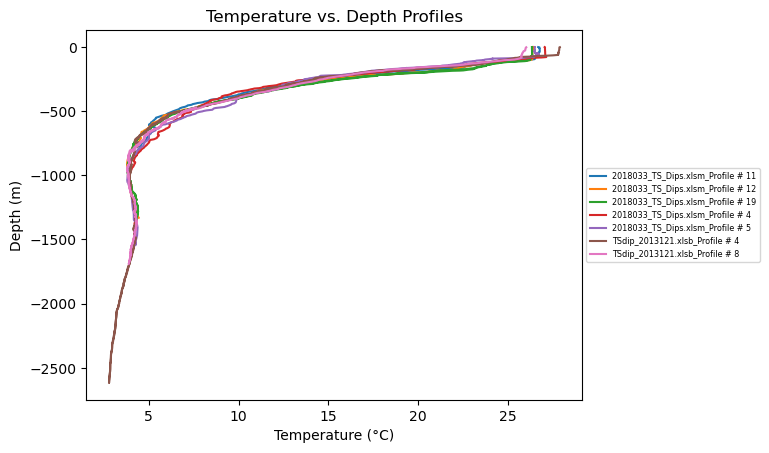

In [70]:
groupedCTD = CTD_df.groupby('ProfileName')
for name, group in groupedCTD:
    plt.plot(group['Temp_C'], group['Depth_m']*-1, label=name)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature vs. Depth Profiles')
plt.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))  # Set the legend font size to 'small'
plt.show()